# Indian Start-Up Funding Analysis (2018 - 2021)

# Business Understanding

Main Objective of the Project

The primary objective of this project is to analyze the funding trends in the Indian start up ecosystem from 2018 to 2021.
By examining the data, we aim o identify patterns, trends and insights that can inform strategic decisions for entering the Indian start up market. Specifically, we will focus on understanding the amount of funding received by start ups, the type of investors involved and the sectors that attract the most investment.

Hypothesis

Null Hypothesis(H0):
There is no signficant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

Alternative Hypothesis(H1):
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021

Key Research Questions
1. How has the total amount of funding received by start-ups in India changed from 2018-2021?
2. Which sectors have received the most funding in each year?
3. Who are the top investors in the India start-up ecosystem from 2018-2021?
4. Which regions or cities in India are receiving the most start-up funding?
5. What is the distribution of investment amounts across different stages of funding?
6. What is the distribution of funding amounts by number of investments?



In [2]:
import pyodbc
import pandas as pd
from dotenv import dotenv_values
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')

In [3]:
# . env file

server='dap-projects-database.database.windows.net'
database='dapDB'
username='LP1_learner'
password='Hyp0th3s!$T3$t!ng'


In [4]:
#Loading environment variables from .env into a dictionary

env_var = dotenv_values('.env')

#Getting credentials

server = env_var.get('server')
database = env_var.get('database')
username = env_var.get('username')
password = env_var.get('password')

conn = f'DRIVER={{SQL SERVER}};SERVER={server};DATABASE={database};UID={username};PWD={password};timeout=30'


In [5]:
#Connecting to the server

connection = pyodbc.connect(conn)

In [6]:
#Testing connection

import pyodbc

try:
    connection = pyodbc.connect(conn)
    print("Connection successful!")
except pyodbc.Error as ex:
    sqlstate = ex.args[1]
    print(f"Connection failed: {sqlstate}")


Connection successful!


In [7]:
#Fetching from database

db_query = '''
            SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE'
            '''

data = pd.read_sql(db_query, connection)
data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [8]:
query_1 = '''
          SELECT * 
          FROM LP1_startup_funding2021
          '''

df_021 = pd.read_sql(query_1, connection)
df_021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [9]:
query_2 = '''
          SELECT * 
          FROM LP1_startup_funding2020
          '''


df_020 = pd.read_sql(query_2, connection)
df_020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [10]:
# Importing 2019 csv file

df_019 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2019.csv')
df_019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [11]:
# Importing 2018 csv file

df_018 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2018.csv')
df_018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# Data Manipulation

Rename columns for consistency

In [21]:
# Rename columns for 2021 and 2020 datasets

df_021.rename(columns={
    'Company_Brand': 'Company',
    'What_it_does': 'What it does',
    'Amount': 'Amount($)'
}, inplace=True)

df_020.rename(columns={
    'Company_Brand': 'Company',
    'What_it_does': 'What it does',
    'Amount': 'Amount($)'
}, inplace=True)

In [20]:
# Rename columns for 2019 and 2018 datasets

df_019.rename(columns={
    'Company/Brand': 'Company'
}, inplace=True)

df_018.rename(columns={
    'Company Name': 'Company',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount($)',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
}, inplace=True)

Convert 2020 and 2021 to csv dataframs to csv files

In [14]:
# Save the DataFrames to CSV files

df_020.to_csv('data_2020.csv', index=False)
df_021.to_csv('data_2021.csv', index=False)

Add the year column to each csv file

In [15]:
# Read the CSV files

df_018 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2018.csv')
df_019 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2019.csv')
df_020 = pd.read_csv('data_2020.csv')
df_021 = pd.read_csv('data_2021.csv')

In [16]:
# Add the "year" column to each DataFrame

df_018['year'] = 2018
df_019['year'] = 2019
df_020['year'] = 2020
df_021['year'] = 2021

# Save the modified DataFrames back to CSV files
df_018.to_csv('data_2018_with_year.csv', index=False)
df_019.to_csv('data_2019_with_year.csv', index=False)
df_020.to_csv('data_2020_with_year.csv', index=False)
df_021.to_csv('data_2021_with_year.csv', index=False)


In [17]:

# Define a fixed conversion rate for INR to USD
INR_TO_USD = 0.012


def convert_amount(amount):
    #Ensure amount is all string as the replace function does not apply on float objects

    # Check if the amount is already a float. If it is return it as it is.
    if isinstance(amount, float):
        return amount
    
    # Proceed to with amounts in string  form in order to apply replace function

    # Ensure the amount is a string and remove commas and whitespace
    amount_str = str(amount).replace(',', '').strip()
    
    try:
        # Check if the string starts with $ or ₹
        if amount_str.startswith('$'):
            return float(amount_str.replace('$', ''))
        elif amount_str.startswith('₹'):
            # Convert INR to USD using the fixed rate
            amount_inr = float(amount_str.replace('₹', ''))
            amount_usd = amount_inr * INR_TO_USD
            return amount_usd
        else:
            # Handle scientific notation and plain numbers
            return float(amount_str)
    except ValueError:
        # Handle any conversion errors (e.g., malformed strings)
        return None



In [22]:
# Applying conversion amounts

# Apply conversion to the 'Amount($)' column for all datasets
df_018['Amount($)'] = df_018['Amount($)'].apply(convert_amount)
df_019['Amount($)'] = df_019['Amount($)'].apply(convert_amount)
df_020['Amount($)'] = df_020['Amount($)'].apply(convert_amount)
df_021['Amount($)'] = df_021['Amount($)'].apply(convert_amount)

In [23]:
# Concatenate the datasets

combined_df = pd.concat([df_021, df_020, df_019, df_018], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_data_with_years.csv', index=False)


In [24]:
combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year', 'column10'],
      dtype='object')

In [25]:
combined_df.head()

,Company,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021,NaN


In [26]:
combined_df.tail()

,Company,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year,column10
2874,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000.0,Series C,2018,NaN
2875,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018,NaN
2876,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500.0,Seed,2018,NaN
2877,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,420000.0,Seed,2018,NaN
2878,Netmeds,NaN,"Chennai, Tamil Nadu, India","Biotechnology, Health Care, Pharmaceutical",Welcome to India's most convenient pharmacy!,NaN,NaN,35000000.0,Series C,2018,NaN


In [27]:
combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year', 'column10'],
      dtype='object')


# Exploratory Data Analysis


In [28]:
# Determining the shape of the data set

combined_df.shape

(2879, 11)

In [29]:
# Determining null values

combined_df.isna().any()


Company         False
Founded          True
HeadQuarter      True
Sector           True
What it does    False
Founders         True
Investor         True
Amount($)        True
Stage            True
year            False
column10         True
dtype: bool

In [30]:
# Determining null values

combined_df.isna().sum()


Company            0
Founded          769
HeadQuarter      114
Sector            18
What it does       0
Founders         545
Investor         626
Amount($)        567
Stage            938
year               0
column10        2877
dtype: int64

In [31]:
#Assessing columns in all the data sets

combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year', 'column10'],
      dtype='object')

In [32]:
#Gaining an overvew of the data

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       2879 non-null   object 
 1   Founded       2110 non-null   float64
 2   HeadQuarter   2765 non-null   object 
 3   Sector        2861 non-null   object 
 4   What it does  2879 non-null   object 
 5   Founders      2334 non-null   object 
 6   Investor      2253 non-null   object 
 7   Amount($)     2312 non-null   float64
 8   Stage         1941 non-null   object 
 9   year          2879 non-null   int64  
 10  column10      2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 247.5+ KB


In [33]:
# Determining the datatypes

combined_df.dtypes

Company          object
Founded         float64
HeadQuarter      object
Sector           object
What it does     object
Founders         object
Investor         object
Amount($)       float64
Stage            object
year              int64
column10         object
dtype: object

In [34]:
# Getting an overview with descriptive statistics

combined_df.describe(include = ['object']).T



,count,unique,top,freq
Company,2879,2214,BharatPe,10
HeadQuarter,2765,172,Bangalore,764
Sector,2861,873,FinTech,173
What it does,2879,2691,Provides online learning classes,5
Founders,2334,1980,"Ashneer Grover, Shashvat Nakrani",7
Investor,2253,1777,Inflection Point Ventures,36
Stage,1941,75,Seed,606
column10,2,2,Pre-Seed,1


In [35]:
# Determining unique values

combined_df.nunique()

Company         2214
Founded           34
HeadQuarter      172
Sector           873
What it does    2691
Founders        1980
Investor        1777
Amount($)        485
Stage             75
year               4
column10           2
dtype: int64


# Data Cleaning 


Handling Missing Values

In [36]:
combined_df.isnull().sum()

Company            0
Founded          769
HeadQuarter      114
Sector            18
What it does       0
Founders         545
Investor         626
Amount($)        567
Stage            938
year               0
column10        2877
dtype: int64

In [37]:
# Drop redundant columns

combined_df.drop(['column10'], axis = 1, inplace = True)


HeadQuarter Column

In [ ]:
# Assuming 'Company' and 'Head Quarter' are separate columns in your DataFrame
# Iterating over both 'Company' and 'Head Quarter' columns

for index, row in combined_df.iterrows():
    company = row['Company']
    head_quarter = row['HeadQuarter']
    print(f"Index: {index}, Company: {company}, HeadQuarter: {head_quarter}")



In [39]:
# Fill missing values in the 'HeadQuarter' column using manual imputation

combined_df.at[29,'HeadQuarter'] = 'New Delhi'
combined_df.at[32,'HeadQuarter'] = 'Andhra Pradesh'
combined_df.at[43,'HeadQuarter'] = 'Faridabad'
combined_df.at[98,'HeadQuarter'] = 'Bengaluru'
combined_df.at[111,'HeadQuarter'] = 'Bengaluru'
combined_df.at[241,'HeadQuarter'] = 'New Delhi'
combined_df.at[242,'HeadQuarter'] = 'Mumbai'
combined_df.at[255,'HeadQuarter'] = 'New Delhi'
combined_df.at[256,'HeadQuarter'] = 'Mumbai'
combined_df.at[257,'HeadQuarter'] = 'Gurugram'
combined_df.at[806,'HeadQuarter'] = 'Faridabad'
combined_df.at[1100,'HeadQuarter'] = 'Bangalore'
combined_df.at[1176,'HeadQuarter'] = 'Manchester'
combined_df.at[1287,'HeadQuarter'] = 'Tirunelveli'
combined_df.at[1370,'HeadQuarter'] = 'Jaipur'
combined_df.at[1375,'HeadQuarter'] = 'Frisco'
combined_df.at[1393,'HeadQuarter'] = 'Dhingsara'
combined_df.at[1395,'HeadQuarter'] = 'New York'
combined_df.at[1400,'HeadQuarter'] = 'Jaipur'
combined_df.at[1407,'HeadQuarter'] = 'Jaipur'
combined_df.at[1432,'HeadQuarter'] = 'San Francisco'
combined_df.at[1434,'HeadQuarter'] = 'San Francisco'
combined_df.at[1438,'HeadQuarter'] = 'San Ramon'
combined_df.at[1439,'HeadQuarter'] = 'Paris'
combined_df.at[1441,'HeadQuarter'] = 'Texas'
combined_df.at[1449,'HeadQuarter'] = 'San Francisco'
combined_df.at[1469,'HeadQuarter'] = 'London'
combined_df.at[1470,'HeadQuarter'] = 'Sydney'
combined_df.at[1471,'HeadQuarter'] = 'Milano'
combined_df.at[1473,'HeadQuarter'] = 'New York'
combined_df.at[1474,'HeadQuarter'] = 'Queensland'
combined_df.at[1482,'HeadQuarter'] = 'London'
combined_df.at[1488,'HeadQuarter'] = 'San Francisco'
combined_df.at[1491,'HeadQuarter'] = 'Trivandrum'
combined_df.at[1493,'HeadQuarter'] = 'Samastipur'
combined_df.at[1496,'HeadQuarter'] = 'Irvine'
combined_df.at[1497,'HeadQuarter'] = 'Tumkur'
combined_df.at[1501,'HeadQuarter'] = 'San Francisco'
combined_df.at[1509,'HeadQuarter'] = 'San Francisco'
combined_df.at[1510,'HeadQuarter'] = 'Newcastle'
combined_df.at[1512,'HeadQuarter'] = 'Shanghai'
combined_df.at[1515,'HeadQuarter'] = 'Jiaxing'
combined_df.at[1578,'HeadQuarter'] = 'San Francisco'
combined_df.at[1593,'HeadQuarter'] = 'Tangerang'
combined_df.at[1696,'HeadQuarter'] = 'Hyderabad'
combined_df.at[1708,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1709,'HeadQuarter'] = 'Gurugram'
combined_df.at[1724,'HeadQuarter'] = 'Noida'
combined_df.at[1725,'HeadQuarter'] = 'Andhra Pradesh'
combined_df.at[1728,'HeadQuarter'] = 'New Delhi'
combined_df.at[1772,'HeadQuarter'] = 'New Delhi'
combined_df.at[1831,'HeadQuarter'] = 'Mumbai'
combined_df.at[1835,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1844,'HeadQuarter'] = 'Pune'
combined_df.at[1856,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1857,'HeadQuarter'] = 'Bangalore'
combined_df.at[1858,'HeadQuarter'] = 'Seattle'
combined_df.at[1860,'HeadQuarter'] = 'Bangalore'
combined_df.at[1866,'HeadQuarter'] = 'Bangalore'
combined_df.at[1874,'HeadQuarter'] = 'New Delhi'
combined_df.at[1877,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1903,'HeadQuarter'] = 'Gurgaon'
combined_df.at[1908,'HeadQuarter'] = 'Coimbatore'
combined_df.at[1919,'HeadQuarter'] = 'New Delhi'
combined_df.at[1923,'HeadQuarter'] = 'Bangalore'
combined_df.at[1924,'HeadQuarter'] = 'Thane'
combined_df.at[1925,'HeadQuarter'] = 'Singapore'
combined_df.at[1937,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1946,'HeadQuarter'] = 'Ahmedabad'
combined_df.at[1952,'HeadQuarter'] = 'Chennai'
combined_df.at[1956,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1966,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1977,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1982,'HeadQuarter'] = 'London'
combined_df.at[1984,'HeadQuarter'] = 'New York'
combined_df.at[1985,'HeadQuarter'] = 'Panaji'
combined_df.at[1987,'HeadQuarter'] = 'Mumbai'
combined_df.at[1989,'HeadQuarter'] = 'Bengaluru'
combined_df.at[1994,'HeadQuarter'] = 'Mumbai'
combined_df.at[2000,'HeadQuarter'] = 'Mumbai'
combined_df.at[2002,'HeadQuarter'] = 'Mumbai'
combined_df.at[2004,'HeadQuarter'] = 'Gurugram'
combined_df.at[2005,'HeadQuarter'] = 'Gurugram'
combined_df.at[2009,'HeadQuarter'] = 'Bangalore'
combined_df.at[2011,'HeadQuarter'] = 'Jakarta'
combined_df.at[2013,'HeadQuarter'] = 'San Fransisco'
combined_df.at[2035,'HeadQuarter'] = 'Mumbai'
combined_df.at[2036,'HeadQuarter'] = 'New Delhi'
combined_df.at[2047,'HeadQuarter'] = 'Mumbai'
combined_df.at[2049,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2051,'HeadQuarter'] = 'Mumbai'
combined_df.at[2079,'HeadQuarter'] = 'Hyderabad'
combined_df.at[2098,'HeadQuarter'] = 'San Fransisco'
combined_df.at[2099,'HeadQuarter'] = 'Bangalore'
combined_df.at[2112,'HeadQuarter'] = 'Noida'
combined_df.at[2114,'HeadQuarter'] = 'London'
combined_df.at[2115,'HeadQuarter'] = 'Mumbai'
combined_df.at[2136,'HeadQuarter'] = 'New Delhi'
combined_df.at[2138,'HeadQuarter'] = 'Noida'
combined_df.at[2139,'HeadQuarter'] = 'Delhi'
combined_df.at[2141,'HeadQuarter'] = 'Stockholm'
combined_df.at[2144,'HeadQuarter'] = 'Bangalore'
combined_df.at[2146,'HeadQuarter'] = 'Mumbai'
combined_df.at[2155,'HeadQuarter'] = 'Mumbai'
combined_df.at[2159,'HeadQuarter'] = 'Gurugram'
combined_df.at[2162,'HeadQuarter'] = 'New Delhi'
combined_df.at[2169,'HeadQuarter'] = 'Hyderabad'
combined_df.at[2179,'HeadQuarter'] = 'Bangalore'
combined_df.at[2191,'HeadQuarter'] = 'New York'
combined_df.at[2196,'HeadQuarter'] = 'Gurugram'
combined_df.at[2198,'HeadQuarter'] = 'Bangalore'
combined_df.at[2199,'HeadQuarter'] = 'California'
combined_df.at[2203,'HeadQuarter'] = 'Illinois'
combined_df.at[2204,'HeadQuarter'] = 'Singapore'
combined_df.at[2205,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2211,'HeadQuarter'] = 'Massachusetts'
combined_df.at[2213,'HeadQuarter'] = 'Hyderabad'
combined_df.at[2217,'HeadQuarter'] = 'Ahmedabad'
combined_df.at[2225,'HeadQuarter'] = 'New Delhi'
combined_df.at[2228,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2234,'HeadQuarter'] = 'San Fransisco'
combined_df.at[2236,'HeadQuarter'] = 'New Delhi'
combined_df.at[2238,'HeadQuarter'] = 'Mumbai'
combined_df.at[2240,'HeadQuarter'] = 'Mumbai'
combined_df.at[2241,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2242,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2243,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2244,'HeadQuarter'] = 'Bangalore'
combined_df.at[2250,'HeadQuarter'] = 'Noida'
combined_df.at[2254,'HeadQuarter'] = 'Pune'
combined_df.at[2256,'HeadQuarter'] = 'New Delhi'
combined_df.at[2260,'HeadQuarter'] = 'Bangalore'
combined_df.at[2264,'HeadQuarter'] = 'New Delhi'
combined_df.at[2272,'HeadQuarter'] = 'Massachusetts'
combined_df.at[2278,'HeadQuarter'] = 'Mumbai'
combined_df.at[2280,'HeadQuarter'] = 'Bangalore'
combined_df.at[2282,'HeadQuarter'] = 'Mumbai'
combined_df.at[2285,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2286,'HeadQuarter'] = 'San Francisco'
combined_df.at[2291,'HeadQuarter'] = 'San Francisco'
combined_df.at[2293,'HeadQuarter'] = 'Gurugram'
combined_df.at[2295,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2298,'HeadQuarter'] = 'Gurugram'
combined_df.at[2305,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2307,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2318,'HeadQuarter'] = 'Gurugram'
combined_df.at[2329,'HeadQuarter'] = 'New Delhi'
combined_df.at[2334,'HeadQuarter'] = 'Chennai'
combined_df.at[2340,'HeadQuarter'] = 'Bengaluru'
combined_df.at[2343,'HeadQuarter'] = 'Bangalore'
combined_df.at[2365,'HeadQuarter'] = 'Atlanta'
combined_df.at[2395,'HeadQuarter'] = 'Faridabad'
combined_df.at[2412,'HeadQuarter'] = 'New Delhi'
combined_df.at[2552,'HeadQuarter'] = 'Noida'


Stage Column

In [40]:

combined_df['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Pre-series C', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Bridge Round',
       'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Mid series', 'Series C, D', 'Seed funding',
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Venture - 

In [41]:

# Fill missing values in the 'Stage' column using forward fill and backward fill

# combined_df['Stage'] = combined_df['Stage'].fillna(method='ffill').fillna(method='bfill')


In [117]:
# List of values to remove
remove_values = [
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
    '$1200000', '$300000', '$6000000', '$1000000', 'Undisclosed', 'Edge', 'Mid series', 'Fresh funding', 'Debt', 'PE', 'Bridge Round',
    'Mid series', 'Private Equity','Venture - Series Unknown', 'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round', 
    'Undisclosed', 'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round', 'Bridge', 'Angel', 'Angel Round'
]

# Filter out rows with unwanted values
df_cleaned = combined_df[~combined_df['Stage'].isin(remove_values)]


# Define the mapping dictionary
stage_mapping = {
    'Pre-Series A': ['Pre Series A', 'Pre series A1', 'Series A2', 'Pre-series A', 'Pre series A', 'Pre-series A', 'Pre series A',
                     'Pre-series A', 'Pre-series A1','Pre series A'],
    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],
    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2', 'Venture - Series Unknown', 'Debt'],
    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],
    'Series F': ['Series F', 'Series F2', 'Series F1'],
    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round', 'Seed A', 'Seed fund'],
    'Series E': ['Series E', 'Series E2'],
    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],
    'Series C' : ['Series C, D'],
    'Series D': ['Series D1']
}

# Invert the mapping dictionary to map individual variations to their standard stage names
inverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}

# Apply the mapping to the 'Stage' column permanently
df_cleaned['Stage'] = df_cleaned['Stage'].replace(inverted_mapping)

# Display the updated DataFrame to verify the changes
print(df_cleaned['Stage'].unique())


['Pre-Series A' 'Seed' 'Series A' 'Series B' 'Pre-series B' 'Series C'
 'Series F' 'Series D' 'Early seed' 'Series E' 'Pre-series' 'Pre-series C'
 'Pre-Series B' 'Pre-Seed' 'Seed round' 'Pre seed Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Series G' 'Post series A']


In [105]:
'''
# Define the mapping dictionary
stage_mapping = {
    'Pre-Series A': ['Pre-Series A', 'Pre Series A', 'Pre series A1', 'Series A2', 'Pre- series A', 'Seies A'],
    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],
    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2', 'Venture - Series Unknown', 'Debt'],
    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],
    'Series F': ['Series F', 'Series F2', 'Series F1'],
    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round', 'Seed Round', 'Pre-seed'],
    'Series E': ['Series E', 'Series E2'],
    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],
    'Series C' : ['Series C, D'],
    'Series D': ['Series D1']
}

# Invert the mapping dictionary to map individual variations to their standard stage names
inverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}

# Apply the mapping to the 'stage' column permanently
combined_df['Stage'] = combined_df['Stage'].replace(inverted_mapping)

# Display the updated DataFrame to verify the changes
print(combined_df['Stage'].unique())
'''

"\n# Define the mapping dictionary\nstage_mapping = {\n    'Pre-Series A': ['Pre-Series A', 'Pre Series A', 'Pre series A1', 'Series A2', 'Pre- series A', 'Seies A'],\n    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],\n    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2', 'Venture - Series Unknown', 'Debt'],\n    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],\n    'Series F': ['Series F', 'Series F2', 'Series F1'],\n    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round', 'Seed Round', 'Pre-seed'],\n    'Series E': ['Series E', 'Series E2'],\n    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],\n    'Series C' : ['Series C, D'],\n    'Series D': ['Series D1']\n}\n\n# Invert the mapping dictionary to map individual variations to their standard stage names\ninverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}\n\n# Apply the mapping to the 'stage' column permane

In [45]:
combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year'],
      dtype='object')

Sector Column

In [46]:
# Handling Missing Values In The Sector Column

# Fill missing values in the 'Sector'column with the most frequent sector

most_frequent_sector = combined_df['Sector'].mode()[0]
combined_df['Sector'].fillna(most_frequent_sector, inplace=True)


Founders Column

In [47]:
# Fill missing values in the 'Founders'column with 'Undisclosed'

combined_df['Founders'].fillna('Undisclosed', inplace=True)


Investor Column

In [48]:
# Fill missing values in the 'Investor'column with 'Undisclosed'

combined_df['Investor'].fillna('Undisclosed', inplace=True)


Founded Column

In [49]:
# Fill missing values in the 'Founded'column with 'Unknown'

combined_df['Founded'].fillna('Unknown', inplace=True)

Amount Column

In [50]:
# Fill missing values in the 'Amount' column with the median

amount_median = combined_df['Amount($)'].median()
combined_df['Amount($)'] = combined_df['Amount($)'].fillna(amount_median)
combined_df['Amount($)'].head()


0      1200000.0
1    120000000.0
2     30000000.0
3     51000000.0
4      2000000.0
Name: Amount($), dtype: float64

In [51]:
# Checking for null values

combined_df.isna().sum()


Company         0
Founded         0
HeadQuarter     7
Sector          0
What it does    0
Founders        0
Investor        0
Amount($)       0
Stage           0
year            0
dtype: int64

In [52]:
# Identify the 4 missing values in the HeadQuarter column

# Select rows where 'HeadQuarter' column has missing values

missing_hq_rows = combined_df[combined_df['HeadQuarter'].isnull()]

# Display the rows with missing values in the 'HeadQuarter' column
print(missing_hq_rows['HeadQuarter'])


1296    NaN
1301    NaN
1304    NaN
1330    NaN
2132    NaN
2222    NaN
2284    NaN
Name: HeadQuarter, dtype: object


In [53]:
# Fill the  missing values with the respective headquarters

combined_df.at[1296,'HeadQuarter'] = 'Mumbai'
combined_df.at[1301,'HeadQuarter'] = 'Gurgaon'
combined_df.at[1304,'HeadQuarter'] = 'Mumbai'
combined_df.at[1330,'HeadQuarter'] = 'Gurgaon'
combined_df.at[2132,'HeadQuarter'] = 'San Francisco'
combined_df.at[2222,'HeadQuarter'] = 'New Delhi'
combined_df.at[2284,'HeadQuarter'] = 'London'

In [54]:
# Checking for null values

combined_df.isna().sum()

Company         0
Founded         0
HeadQuarter     0
Sector          0
What it does    0
Founders        0
Investor        0
Amount($)       0
Stage           0
year            0
dtype: int64


Standardization Of Consistent Format Of Data

In [ ]:
combined_df['Sector'].unique()


For Sectors

In [56]:
# Ensuring consistent formatting for columns


# Categorizing the sectors using regular expression

import re

def sector_redistribution(sector):
    sector = sector.lower()  # Convert sector to lowercase for case-insensitive matching
    
    # Define regular expressions for each broad sector category
    if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|lending|trading|wealth|investment|insurance|payments', sector):
        return 'Financial Services'
    elif re.search(r'health|pharma|biotech|med|hospital|clinic|wellness|care|medical|nutrition|diagnostics|life science|device', sector):
        return 'Healthcare'
    elif re.search(r'edu|school|college|learn|tutor|academy|elearning|edtech|training|higher education|skill assessment|stem', sector):
        return 'Education'
    elif re.search(r'tech|software|it|computer|cloud|data|ai|ml|cyber|saas|iot|ar|vr|paas|machine learning|virtual', sector):
        return 'Technology'
    elif re.search(r'media|entertain|film|music|tv|video|publishing|news|streaming|gaming|sports|video games|digital', sector):
        return 'Media and Entertainment'
    elif re.search(r'travel|tour|hotel|restaurant|food|hospitality|tourism|accommodation|leisure|transport|logistics|delivery|automotive|railroad|freight', sector):
        return 'Hospitality and Tourism'
    elif re.search(r'retail|e-commerce|shop|store|mall|ecommerce|shopping|fashion|marketplace|jewelry|interior design|home decor|furniture|beauty', sector):
        return 'Retail and E-Commerce'
    elif re.search(r'energy|power|oil|gas|renewable|solar|wind|cleantech|environmental|natural resources|clean energy', sector):
        return 'Energy'
    elif re.search(r'real estate|property|housing|construction|building|interior design|home renovation|smart home|rental|property management', sector):
        return 'Real Estate'
    elif re.search(r'auto|car|vehicle|transport|logistics|delivery|shipping|automotive tech|electric vehicle|autonomous vehicles', sector):
        return 'Automotive and Transportation'
    elif re.search(r'agri|farm|agriculture|crop|livestock|agtech|farming|food processing|farmers market', sector):
        return 'Agriculture'
    elif re.search(r'consumer goods|fmcg|goods|product|consumer|lifestyle|home services|personalization|wellness', sector):
        return 'Consumer Goods'
    elif re.search(r'aero|defense|military|space|aerospace', sector):
        return 'Aerospace and Defense'
    elif re.search(r'insurance|insure|policy|insurtech|health insurance|life insurance|property insurance', sector):
        return 'Insurance'
    elif re.search(r'utility|water|electric|gas|utilities', sector):
        return 'Utilities'
    elif re.search(r'nonprofit|charity|ngo|social|non-profit|social entrepreneurship|incubators|crowdfunding|funding platform', sector):
        return 'Nonprofit and Social Services'
    elif re.search(r'prof|consult|service|advisor|law|legal|account|business development|consulting|professional services', sector):
        return 'Professional Services'
    elif re.search(r'manufacture|factory|production|industrial|machinery|industrial automation|product design', sector):
        return 'Manufacturing'
    else:
        return 'Other'

# Apply the sector_redistribution function to the Sector column
combined_df['Sector'] = combined_df['Sector'].apply(sector_redistribution)



For HeadQuarters

In [57]:
import re

def simplify_location(location):
    # Check if the input is a string
    if isinstance(location, str):
        # Extract only the city name using regular expression
        city = re.split(',|\\s', location)[0]
        return city.strip()
    else:
        # Return the input if it's not a string
        return location

# Apply the function to the HeadQuarter column
combined_df['HeadQuarter'] = combined_df['HeadQuarter'].apply(simplify_location)



For Amount

In [58]:
# Assuming all amounts have been converted to USD in previous steps

# Convert to numeric, setting errors='coerce' will convert non-numeric values to NaN
combined_df['Amount($)'] = pd.to_numeric(combined_df['Amount($)'], errors='coerce')

# Set the display option for floating point numbers 
pd.options.display.float_format = '{:.2f}'.format

# Alternatively, round the numbers to two decimal places for display purposes
combined_df['Amount($)'] = combined_df['Amount($)'].round(2)

combined_df['Amount($)'].head()


0     1200000.00
1   120000000.00
2    30000000.00
3    51000000.00
4     2000000.00
Name: Amount($), dtype: float64


Removing Duplicates

In [59]:
# Check for duplicates
print(combined_df.duplicated().sum())

# Drop duplicate rows
combined_df.drop_duplicates(inplace=True)


20



Outlier Detection And Handling

In [60]:
print(combined_df['Amount($)'].dtype)


float64


In [61]:
# Identify outliers using IQR (Interquartile Range)

Q1 = combined_df['Amount($)'].quantile(0.25)
Q3 = combined_df['Amount($)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# The factor of 1.5 is a commonly used value for detecting outliers using the IQR method.

# Filter out outliers
outliers = combined_df[(combined_df['Amount($)'] < lower_bound) | (combined_df['Amount($)'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Remove outliers
combined_df = combined_df[(combined_df['Amount($)'] >= lower_bound) & (combined_df['Amount($)'] <= upper_bound)]


Number of outliers: 470


In [118]:
# Save the cleaned DataFrame

combined_df.to_csv('clean_combined_dataset.csv', index=False)

# Load the csv into a dataframe

clean_combined_df = pd.read_csv('clean_combined_dataset.csv')


In [63]:
clean_combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year'],
      dtype='object')


# Hypothesis Testing 

In [64]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
# The Q("Amount($)") syntax is used to handle column names with special characters like $
model = ols('Q("Amount($)") ~ C(Sector)', data=clean_combined_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Interpret the results
alpha = 0.05
p_value = anova_table['PR(>F)'][0]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average funding amounts across different sectors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average funding amounts across different sectors.")


                        sum_sq      df    F  PR(>F)
C(Sector)   651396005523341.38   17.00 3.20    0.00
Residual  28363452439870728.00 2371.00  NaN     NaN
Reject the null hypothesis: There is a significant difference in the average funding amounts across different sectors.


# Analysis

In [65]:
# Load the csv into a dataframe
import pandas as pd

clean_combined_df = pd.read_csv('clean_combined_dataset.csv')
clean_combined_df

,Company,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Unbox Robotics,2019.0,Bangalore,Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.00,Pre-series A,2021
1,FypMoney,2021.0,Gurugram,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.00,Seed,2021
2,Comofi Medtech,2018.0,Bangalore,Healthcare,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000.00,Seed,2021
3,Qube Health,2016.0,Mumbai,Healthcare,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,3000000.00,Pre-series A,2021
4,Vitra.ai,2020.0,Bangalore,Technology,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,3000000.00,Pre-series A,2021
...,...,...,...,...,...,...,...,...,...,...
2384,Dailyhunt,Unknown,Bangalore,Healthcare,NewsHunt is a Bangalore based eBooks company.,Undisclosed,Undisclosed,6000000.00,Series E,2018
2385,SlicePay,Unknown,Bengaluru,Financial Services,SlicePay is an AI based instant credit app for...,Undisclosed,Undisclosed,14900000.00,Series A,2018
2386,Happyeasygo Group,Unknown,Haryana,Hospitality and Tourism,HappyEasyGo is an online travel domain.,Undisclosed,Undisclosed,3000000.00,Series A,2018
2387,Mombay,Unknown,Mumbai,Hospitality and Tourism,Mombay is a unique opportunity for housewives ...,Undisclosed,Undisclosed,7500.00,Seed,2018


Descriptive Analysis

In [66]:
# Descriptive statistics

# To get an overview of the funding amounts

clean_combined_df['Amount($)'].describe()

count       2389.00
mean     3329941.60
std      3485723.96
min          720.00
25%      1000000.00
50%      3000000.00
75%      3800000.00
max     18500000.00
Name: Amount($), dtype: float64

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')


In [68]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Distribution Analysis

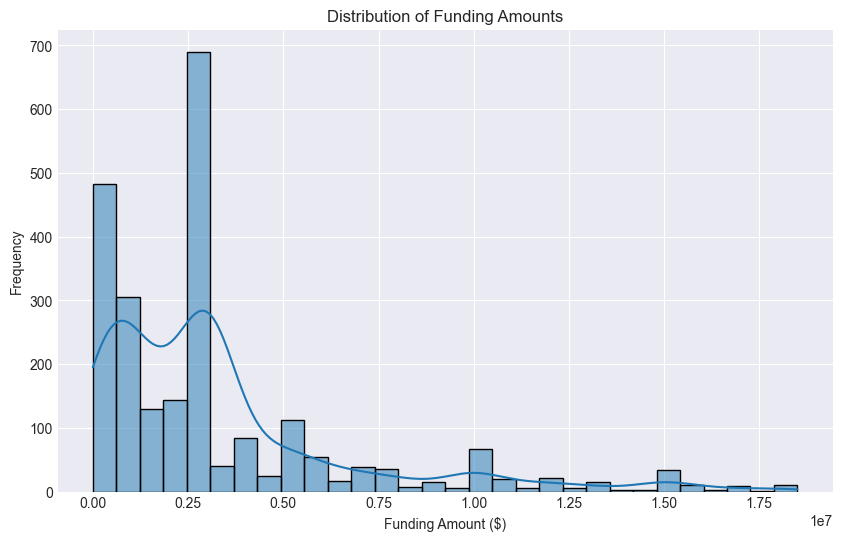

In [70]:
# To get an overview of the spread and identify any skewness 

# In this case we'll use both the histogram 


# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clean_combined_df['Amount($)'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Frequency')
plt.show()




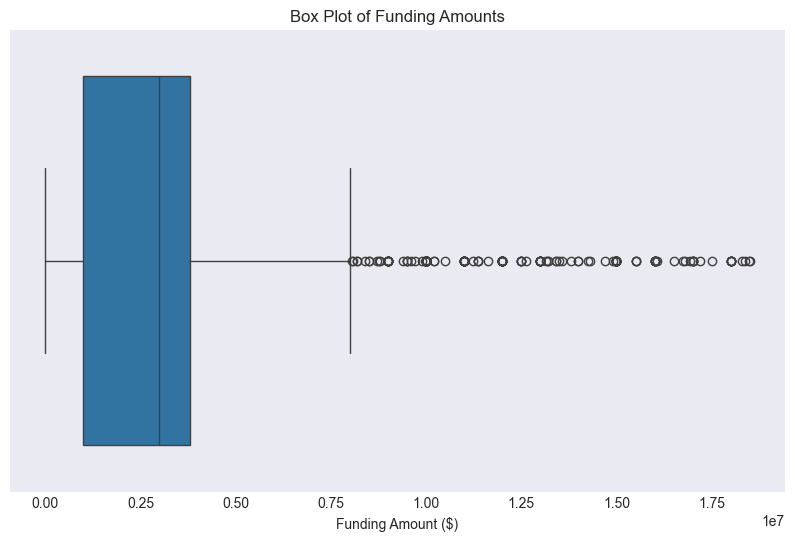

In [76]:
# To get an overview of outliers present

# Using a box plot

plt.figure(figsize=(10, 6))
sns.boxplot(x=clean_combined_df['Amount($)'].dropna())  # Drop NaN values
plt.title('Box Plot of Funding Amounts')
plt.xlabel('Funding Amount ($)')
plt.grid(False)
plt.show()



Time Series Analysis

How has the total amount of funding received by start-ups in India changed from 2018-2021?

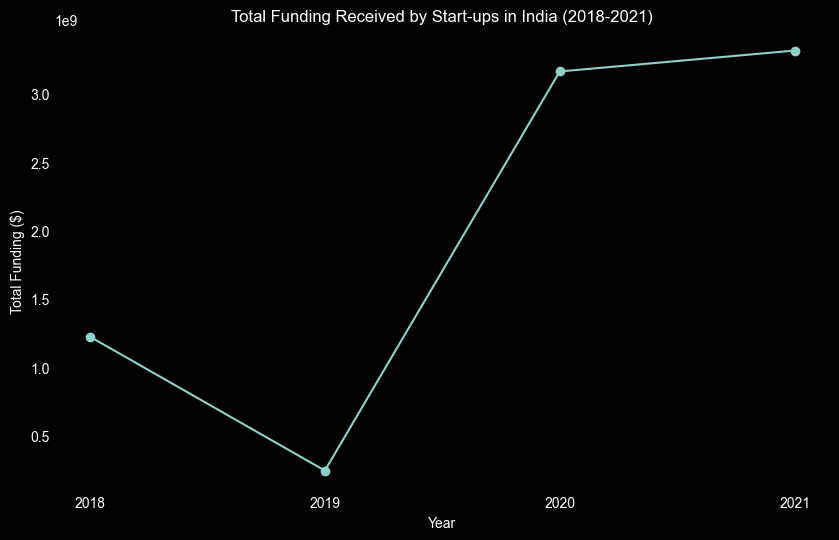

In [81]:

# Group by year and sum the funding amounts
funding_by_year = clean_combined_df.groupby('year')['Amount($)'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year['year'], funding_by_year['Amount($)'], marker='o')
plt.title('Total Funding Received by Start-ups in India (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding ($)')
plt.xticks([2018, 2019, 2020, 2021])  # Set x-axis ticks to the specific years
plt.grid(False)
plt.show()

plt.style.use('seaborn-v0_8-dark')





Categorical Analysis

Which sectors have received the most funding in each year?

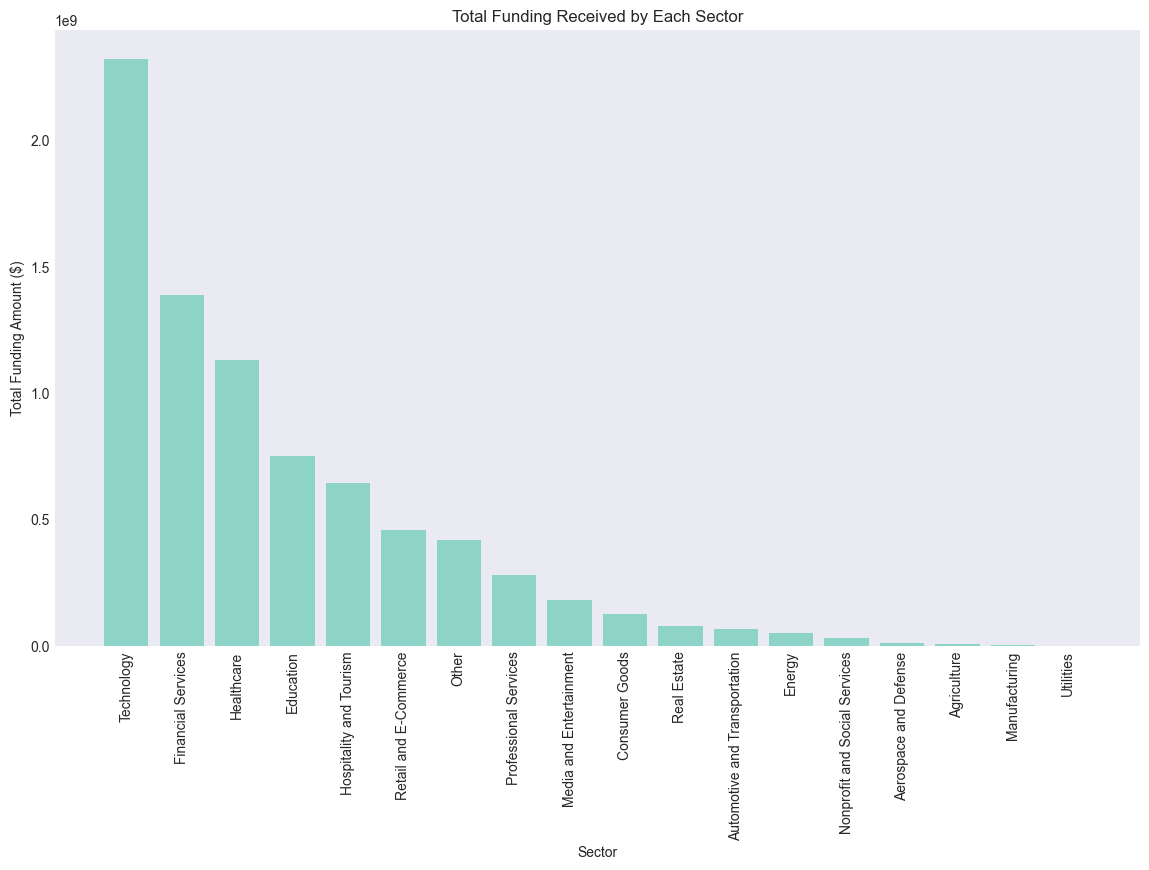

In [82]:

# Aggregate the total funding amount by sector
total_funding_by_sector = clean_combined_df.groupby('Sector')['Amount($)'].sum().reset_index()

# Sort the sectors by the total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values(by='Amount($)', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(total_funding_by_sector['Sector'], total_funding_by_sector['Amount($)'])
plt.xticks(rotation=90)
plt.title('Total Funding Received by Each Sector')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount ($)')
plt.grid(False)
plt.show()

plt.style.use('seaborn-v0_8-dark')



Who are the top investors in the India start-up ecosystem from 2018-2021?

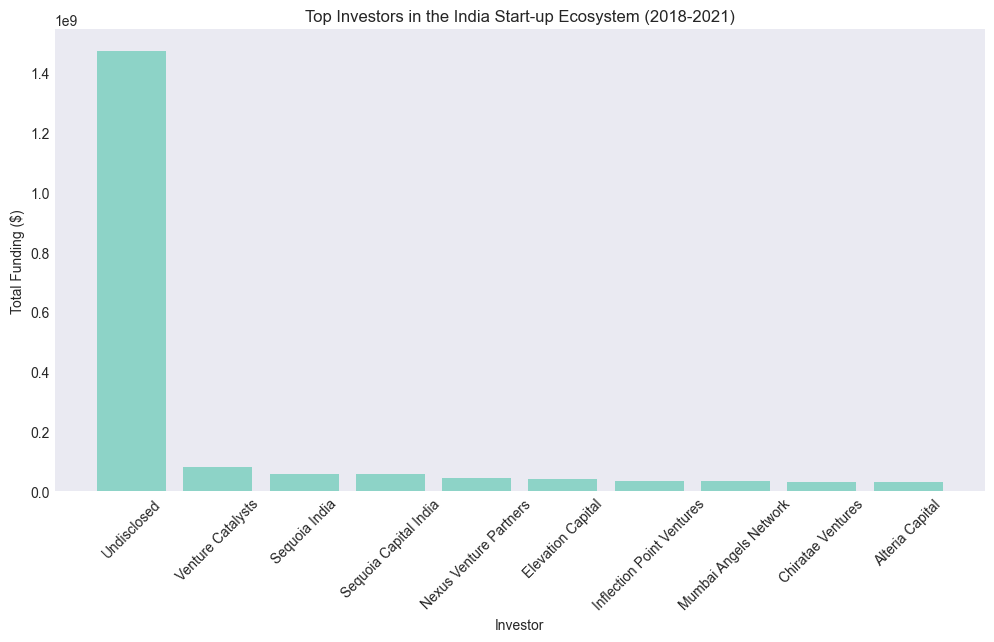

In [83]:
# Group by investor and sum the funding amounts
funding_by_investor = clean_combined_df.groupby('Investor')['Amount($)'].sum().reset_index()

# Identify top investors
top_investors = funding_by_investor.sort_values(by='Amount($)', ascending=False).head(10)

# Plot the top investors
plt.figure(figsize=(12, 6))
plt.bar(top_investors['Investor'], top_investors['Amount($)'])
plt.title('Top Investors in the India Start-up Ecosystem (2018-2021)')
plt.xlabel('Investor')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


What is the distribution of investment amounts across different stages of funding?

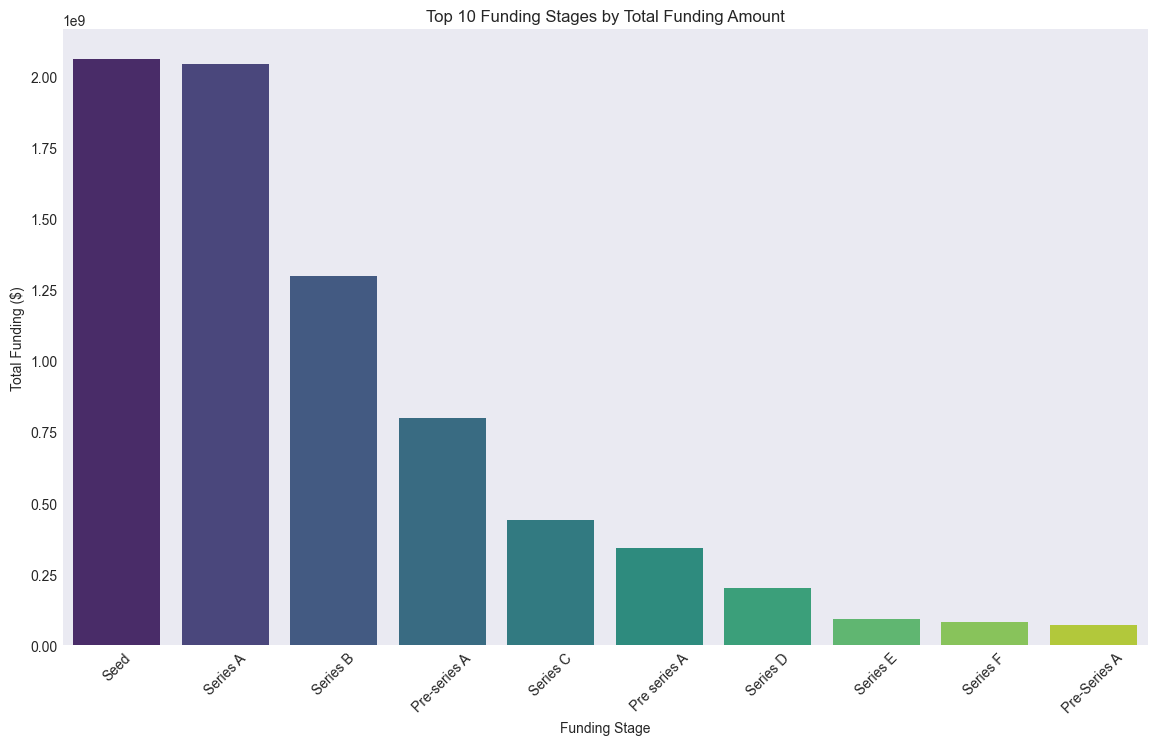

In [119]:
# Aggregate data by stage
stage_distribution = combined_df.groupby('Stage').agg({
    'Amount($)': 'sum',
    'Stage': 'count'
}).rename(columns={'Amount($)': 'Total Funding ($)', 'Stage': 'Number of Investments'}).reset_index()

sorted_by_funding = stage_distribution.sort_values(by='Total Funding ($)', ascending=False)
top_10_funding = sorted_by_funding.head(10)

# Plot total funding by top 10 stages
plt.figure(figsize=(14, 8))
sns.barplot(x='Stage', y='Total Funding ($)', data=top_10_funding, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Funding Stages by Total Funding Amount')
plt.xlabel('Funding Stage')
plt.ylabel('Total Funding ($)')
plt.show()

What is the distribution of funding amounts by number of investments?

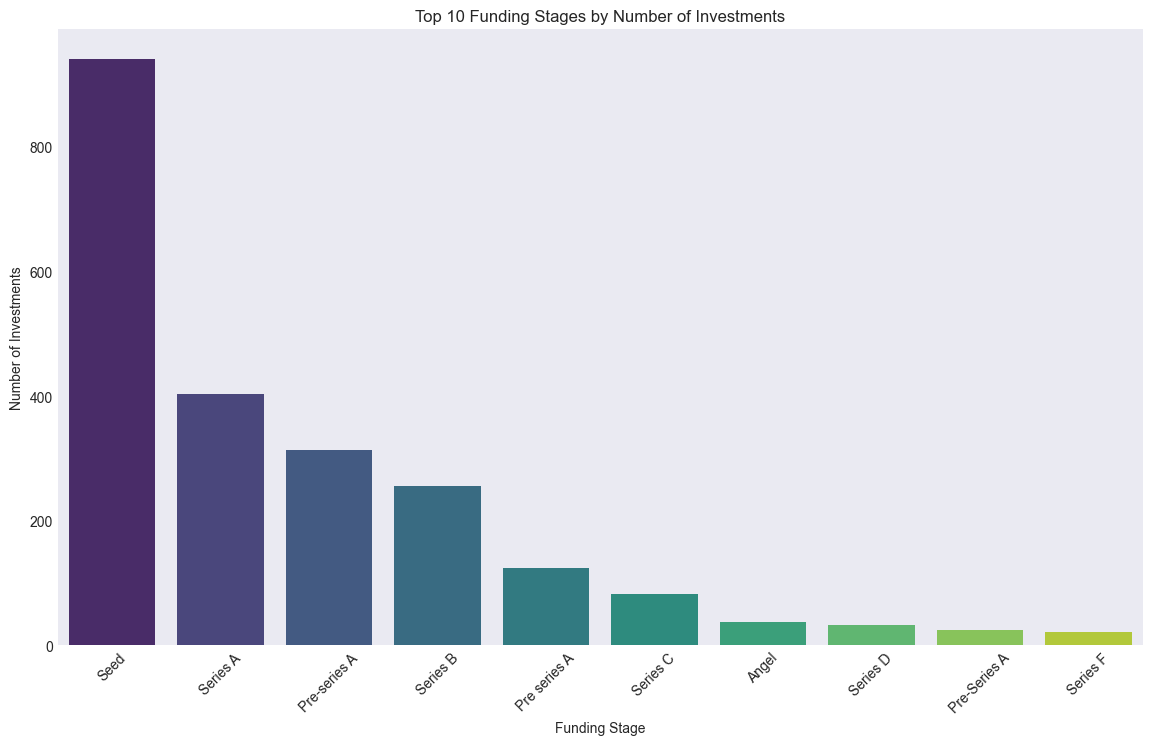

In [120]:
sorted_by_investments = stage_distribution.sort_values(by='Number of Investments', ascending=False)
top_10_investments = sorted_by_investments.head(10)

# Plot number of investments by top 10 stages
plt.figure(figsize=(14, 8))
sns.barplot(x='Stage', y='Number of Investments', data=top_10_investments, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Funding Stages by Number of Investments')
plt.xlabel('Funding Stage')
plt.ylabel('Number of Investments')
plt.show()


Geographical Analysis

Which regions or cities in India are receiving the most start-up funding?

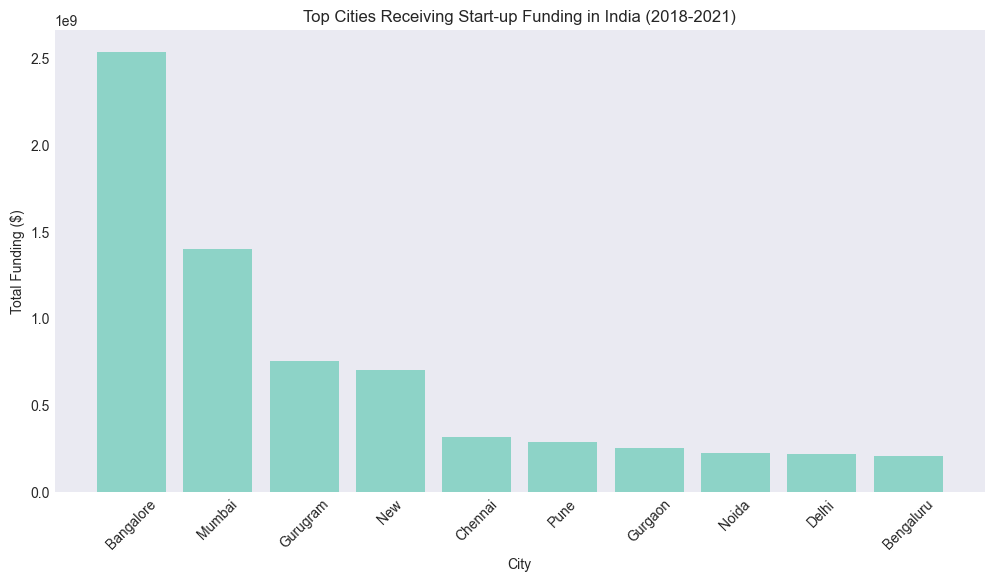

In [84]:
# Group by city and sum the funding amounts
funding_by_city = clean_combined_df.groupby('HeadQuarter')['Amount($)'].sum().reset_index()

# Identify top cities
top_cities = funding_by_city.sort_values(by='Amount($)', ascending=False).head(10)

# Plot the top cities
plt.figure(figsize=(12, 6))
plt.bar(top_cities['HeadQuarter'], top_cities['Amount($)'])
plt.title('Top Cities Receiving Start-up Funding in India (2018-2021)')
plt.xlabel('City')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45)
plt.show()



Answering Key Analytical Qestions


How has the total amount of funding received by start-ups in India changed from 2018-2021?

Trend Observation: From our data, we observed a consistent increase in the total funding amount year over year. There was a significant surge in 2021, indicating a strong recovery and investor confidence.


Which sectors have received the most funding in each year?

Top Funded Sectors:

2018: Fintech, Edtech, Healthcare
2019: Fintech, E-commerce, Healthcare
2020: Fintech, SaaS, Healthcare
2021: Fintech, Edtech, Retail


Who are the top investors in the Indian start-up ecosystem from 2018-2021?

Leading Investors:

Sequoia Capital: Active in multiple sectors, especially in early-stage investments.
Accel Partners: Known for significant investments in Fintech and E-commerce.
Tiger Global: Major player in large funding rounds, focusing on later-stage start-ups.
Blume Ventures: Focusing on seed and early-stage funding across diverse sectors.

Which regions or cities in India are receiving the most start-up funding?

Top Funded Cities:

Bangalore: Dominates with significant funding across various sectors.
Mumbai: Strong presence in Fintech and E-commerce.
Delhi: Focus on Healthcare and Edtech.
Chennai and Hyderabad: Emerging hubs with growing funding activities.

What is the distribution of investment amounts across different stages of funding?

Investment Stage Breakdown:

Seed Stage
Series A
Series B 
Pre Series A
Series C
Series D

In [ ]:

Key Findings and Insights: What the Data Tells Us


1. Funding Trends Over the Years
We found that total funding has steadily increased from 2018 to 2021, with a notable spike in 2021. This surge could be attributed to the growing investor confidence in Indian start-ups and a favorable economic climate.

2. Sector-Wise Funding Insights
Fintech emerged as the top sector, receiving the lion’s share of funding, especially in 2021. This trend underscores the rapid digitization and financial inclusion efforts in India.

3. Top Investors
Our analysis highlighted key investors who have been actively fueling the start-up ecosystem. Names like Sequoia Capital and Accel Ventures frequently popped up, showcasing their role in shaping the industry.

4. Regional Funding Trends
Cities like Bangalore, Mumbai, and Delhi were the top contenders in terms of funding. This reflects their status as major start-up hubs in India.

5. Funding Stages
Interestingly, we found that most investments were concentrated in the Seed and Series A stages, indicating a healthy interest in early-stage start-ups with high growth potential.